<a href="https://colab.research.google.com/github/cashby-890/ST-554-Project1/blob/main/Task2/ST_554_Project_1_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of UCI's Air Quality Data**

As fun as diving into a dataset sounds, we need to install and import a few packages that allow us to produce numerical and graphical summaries for our variables of interest. Our ultimate goal is to observe any trends or behaviors in the benzene concentration subject to other variables like the temperature, humidity, and the sensor measurements of other pollutants in the air like carbon monoxide and ozone.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install ucimlrepo

Notice that we had to install the machine learning repository from UCI, better known as `ucimlrepo`, in order to access the data set that we need. After installing the repo, we now need to import it as `uci`.

In [81]:
import ucimlrepo as uci

Next, we'll "fetch" the file that contains the air quality data set from the repo.

In [82]:
air_quality=uci.fetch_ucirepo(id=360)

To get the data itself, we'll need to use the `data.features` attribute. Here's a tiny sample of the observations from it.

In [83]:
aq_data=air_quality.data.features
aq_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


## **Possible Data Cleaning Ahead...**

Something looks strange; let's check to see if everything was read in appropriately.

In [84]:
aq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


Let's dig in a little bit further by pulling up some summary statistics for the dataset.

In [85]:
aq_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


It's clear that we'll need to remove some entires that nake no sense in this context, as having a pollutant concentration of -200 micrograms per cubic meter is clearly absurd. However, before we do any data cleaning, we'll need to make a few adjustments to the date and time variables and define a few more variables for the month, year, the time of day, and range of temperatures.

In [86]:
aq_data["Date_TS"]=aq_data.Date.astype('datetime64[ns]')
aq_data["Time_TS"]=aq_data.Time.astype('timedelta64[ns]')
aq_data["Month_TS"]=aq_data.Date_TS.astype('period[M]')
aq_data["Year_TS"]=aq_data.Date_TS.astype('period[Y]')
aq_data["Time_of_Day"]=pd.cut(aq_data.Time_TS,3,labels=["Early","Mid","Late"])
aq_data["Temp_Range"]=pd.cut(aq_data['T'],bins=[-20,0,15,30,50],labels=["Cold","Cool","Warm","Hot"])

## **Beginning the Data Cleaning Process**

Notice that in our quick "description" of the data set, the minimum value for ***all*** the variables (besides the date and time) is -200, which can definitely raise more than a few sets of eyebrows. Let's find the entries where the benzene concentration is -200 and remove them from the data set.

In [87]:
aq_cleaned_data=aq_data.loc[aq_data['C6H6(GT)']!=-200]
aq_cleaned_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,PT08.S5(O3),T,RH,AH,Date_TS,Time_TS,Month_TS,Year_TS,Time_of_Day,Temp_Range
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,...,1268,13.6,48.9,0.7578,2004-03-10,0 days 18:00:00,2004-03,2004,Late,Cool
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,...,972,13.3,47.7,0.7255,2004-03-10,0 days 19:00:00,2004-03,2004,Late,Cool
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,...,1074,11.9,54.0,0.7502,2004-03-10,0 days 20:00:00,2004-03,2004,Late,Cool
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,...,1203,11.0,60.0,0.7867,2004-03-10,0 days 21:00:00,2004-03,2004,Late,Cool
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,...,1110,11.2,59.6,0.7888,2004-03-10,0 days 22:00:00,2004-03,2004,Late,Cool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,...,1729,21.9,29.3,0.7568,2005-04-04,0 days 10:00:00,2005-04,2005,Mid,Warm
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,...,1269,24.3,23.7,0.7119,2005-04-04,0 days 11:00:00,2005-04,2005,Mid,Warm
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,...,1092,26.9,18.3,0.6406,2005-04-04,0 days 12:00:00,2005-04,2005,Mid,Warm
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,...,770,28.3,13.5,0.5139,2005-04-04,0 days 13:00:00,2005-04,2005,Mid,Warm


Since our exploratory data analysis is focused on analyzing any relationships that the true benzene concentration has with the non-true `PT08.Sx` and the weather variables, we'll drop the other `(GT)` columns that do not pertain to the true benzene concentration.

In [88]:
aq_cleaned_relevant_data=aq_cleaned_data.drop(['Date','Time','CO(GT)','NMHC(GT)','NOx(GT)','NO2(GT)'],axis=1)
aq_cleaned_relevant_data

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_TS,Time_TS,Month_TS,Year_TS,Time_of_Day,Temp_Range
0,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578,2004-03-10,0 days 18:00:00,2004-03,2004,Late,Cool
1,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255,2004-03-10,0 days 19:00:00,2004-03,2004,Late,Cool
2,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502,2004-03-10,0 days 20:00:00,2004-03,2004,Late,Cool
3,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867,2004-03-10,0 days 21:00:00,2004-03,2004,Late,Cool
4,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888,2004-03-10,0 days 22:00:00,2004-03,2004,Late,Cool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568,2005-04-04,0 days 10:00:00,2005-04,2005,Mid,Warm
9353,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119,2005-04-04,0 days 11:00:00,2005-04,2005,Mid,Warm
9354,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406,2005-04-04,0 days 12:00:00,2005-04,2005,Mid,Warm
9355,1003,9.5,961,702,1041,770,28.3,13.5,0.5139,2005-04-04,0 days 13:00:00,2005-04,2005,Mid,Warm


Now, let's rerun our quick summary stats to see what improvements have been made.

In [89]:
aq_cleaned_relevant_data.describe(include=['int64','float64'])

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


That's better! Now we can explore if any patterns or relationships exist in this dataset.

## **Univariate Distributions in Air Quality Dataset**

First up is the histogram for the true benzene concentration, which is our variable of interest. This is very heavily right-skewed; if one were to do any modeling, a transformation of this variable will have to be made, most likely a log transformation.

Unless otherwise specified, each histogram uses 25 bins.

Text(0.5, 1.0, 'Distribution of True Benzene Concentration')

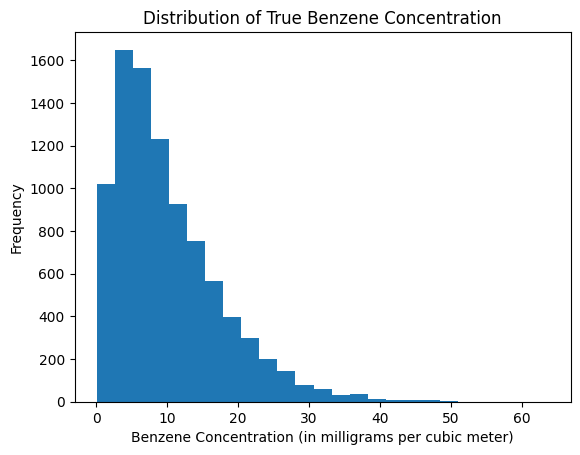

In [90]:
plt.hist(aq_cleaned_relevant_data['C6H6(GT)'],bins=25)
plt.xlabel('Benzene Concentration (in milligrams per cubic meter)')
plt.ylabel('Frequency')
plt.title('Distribution of True Benzene Concentration')

The next five histograms pertain to the sensor measurements. Below is the histogram for the sensor measurement of carbon monoxide, which is also noticeably right-skewed, but not quite to the extent of that for the true benzene concentration.

Text(0.5, 1.0, 'Distribution of Sensor Measurement Level for Carbon Monoxide \n (using technology from tin oxide)')

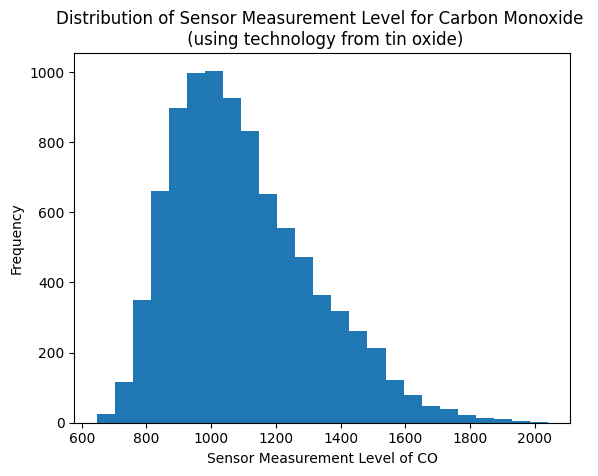

In [91]:
plt.hist(aq_cleaned_relevant_data['PT08.S1(CO)'],bins=25)
plt.xlabel('Sensor Measurement Level of CO')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor Measurement Level for Carbon Monoxide \n (using technology from tin oxide)')

Second is the histogram for the sensor measurement of non-metanic hydrocarbons; with a few minor numerical differences, this is also noticeably right-skewed, quite similarly to that of the sensor measurement of carbon monoxide.

Text(0.5, 1.0, 'Distribution of Sensor Measurement Level for Non-Metanic Hydrocarbons \n (using technology from titania)')

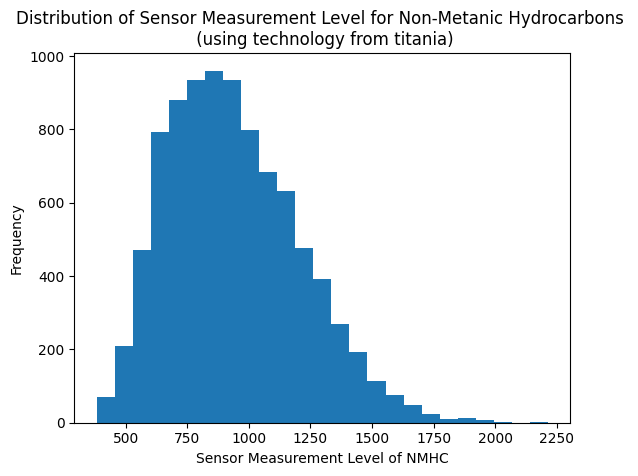

In [92]:
plt.hist(aq_cleaned_relevant_data['PT08.S2(NMHC)'],bins=25)
plt.xlabel('Sensor Measurement Level of NMHC')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor Measurement Level for Non-Metanic Hydrocarbons \n (using technology from titania)')

Third is the histogram for the sensor measurements for both types of nitrogen oxide. Like the other two, this is also right-skewed, but with larger frequencies near it's notable higher peak. There may also be quite a few more extreme values larger than 2000, possibly due to the difference scaling on the x-axis.

Text(0.5, 1.0, 'Distribution of Sensor Measurement Levels for both Nitrogen Oxides \n (using technology from tungsten oxide)')

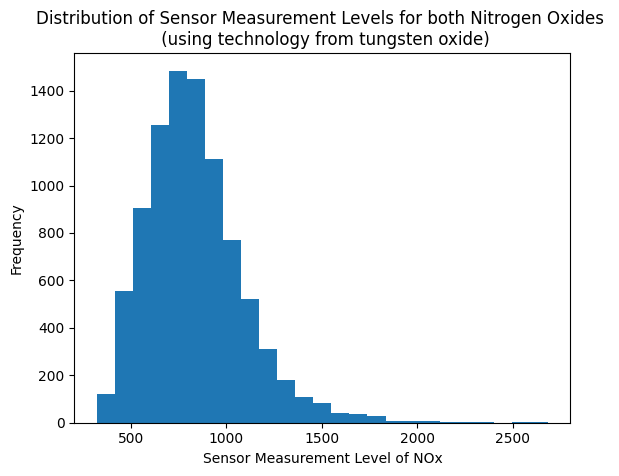

In [93]:
plt.hist(aq_cleaned_relevant_data['PT08.S3(NOx)'],bins=25)
plt.xlabel('Sensor Measurement Level of NOx')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor Measurement Levels for both Nitrogen Oxides \n (using technology from tungsten oxide)')

In a contrast to the histograms we've seen so far, accounting for just nitrogen dioxide appears to remove that element of skewness that was present in others. It might be best to avoid performing a transformation to this particular variable since it already looks nearly bell-shaped. The right tail in this distribution isn't as pronounced as in the others.

Text(0.5, 1.0, 'Distribution of Sensor Measurement Level for Nitrogen Dioxide \n (using technology from tungsten oxide)')

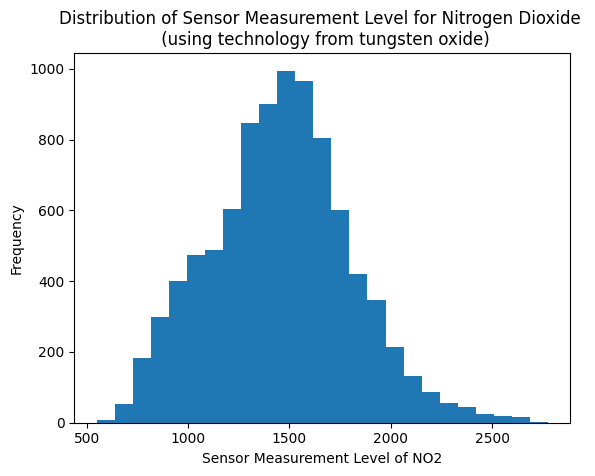

In [94]:
plt.hist(aq_cleaned_relevant_data['PT08.S4(NO2)'],bins=25)
plt.xlabel('Sensor Measurement Level of NO2')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor Measurement Level for Nitrogen Dioxide \n (using technology from tungsten oxide)')

Lastly, for the histogram of the sensor measurements for ozone, we resume our right-skewed type pattern, but with a seemingly thicker right tail than the others and a lower frequency peak of slightly less than 600, compared to the others that have a peak of near 1000 or even higher.

Text(0.5, 1.0, 'Distribution of Sensor Measurement Level for Ozone \n (using technology from indium oxide)')

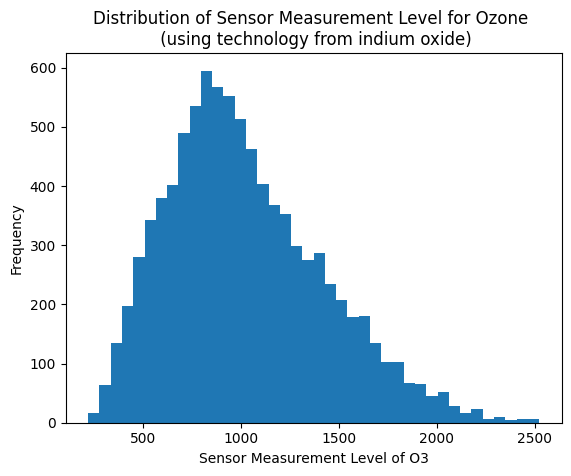

In [95]:
plt.hist(aq_cleaned_relevant_data['PT08.S5(O3)'],bins=40)
plt.xlabel('Sensor Measurement Level of O3')
plt.ylabel('Frequency')
plt.title('Distribution of Sensor Measurement Level for Ozone \n (using technology from indium oxide)')

Next, we'll move on to the histograms for the weather-related variables. Again, 25 bins are used in each of these.

First is the temperature in degrees Celsius, which mostly appears to follow a normal distribution. Notice that the lack of length of "tails" can indicate that there are very few outliers, if any, on either end.

Text(0.5, 1.0, 'Distribution of Temperatures')

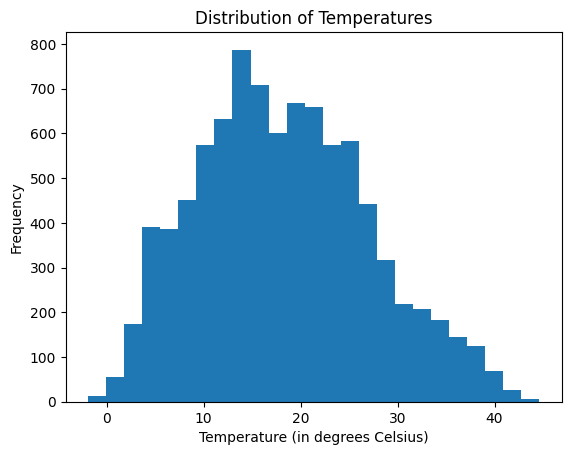

In [96]:
plt.hist(aq_cleaned_relevant_data['T'],bins=25)
plt.xlabel('Temperature (in degrees Celsius)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperatures')

Next up is the histogram for the relative humidities. Again, this appears to be normally distributed with virtually no existence of a "tail" on either end, leaving even a smaller amount of room for outliers.

Text(0.5, 1.0, 'Distribution of Relative Humidities')

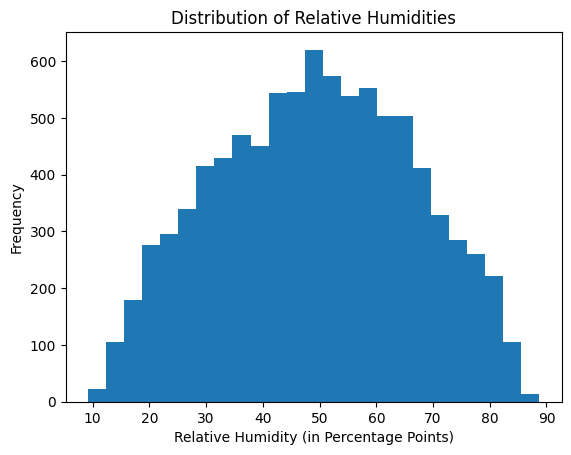

In [97]:
plt.hist(aq_cleaned_relevant_data['RH'],bins=25)
plt.xlabel('Relative Humidity (in Percentage Points)')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidities')

Lastly, for the absolute humidity, it's not unreasonable to say this also follows a fairly normal distribution; however, a right tail appears to be forming as the absolute humidity gets closer to 2.0. There might be a hint of right-skewed behavior in that regard.

Text(0.5, 1.0, 'Distribution of Absolute Humidities')

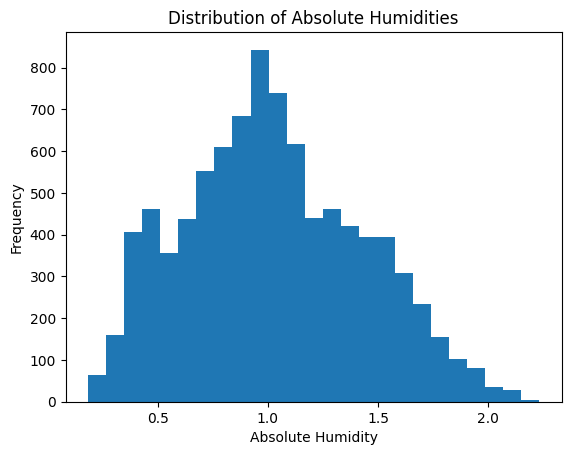

In [98]:
plt.hist(aq_cleaned_relevant_data['AH'],bins=25)
plt.xlabel('Absolute Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Humidities')

## **Grouped Numeric and Graphical Summaries of True Benzene Concentration**

Before diving into relationships between the true benzene concentration and other variables, let's look at a few grouped summaries.

First, we'll see how the true benzene concentration is affected by temperature levels.

In [99]:
aq_cleaned_relevant_data.groupby("Temp_Range",observed=False)['C6H6(GT)'].agg(['mean','median','min','max','std','count'])

,mean,median,min,max,std,count
Temp_Range,,,,,,
Cold,2.900000,1.15,0.2,12.4,3.976276,14
Cool,8.297160,6.10,0.1,63.7,7.142676,3521
Warm,11.224281,9.30,0.5,52.1,7.752997,4518
Hot,11.397655,10.90,1.8,32.3,5.484562,938


Below is a barplot representing the number of observations in each temperature range, as described in the last column of the table above.

As expected, we have a vastly large amount of observations when the temperature is just above freezing, but not too hot (between 0 and 30 degrees Celsius).

Text(0.5, 1.0, 'Barplot of Benzene Concentration Counts \n in Each Temperature Range')

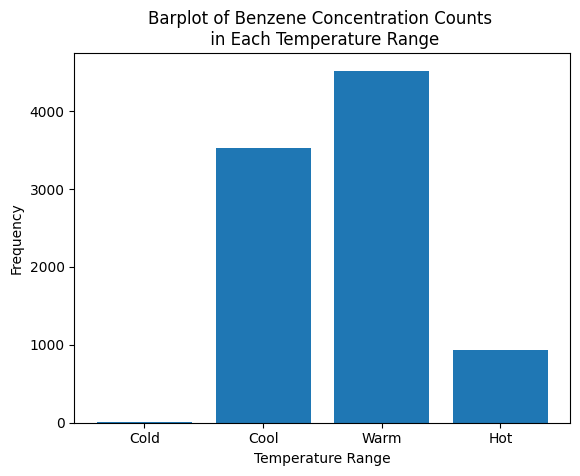

In [100]:
benzene_by_temperature=aq_cleaned_relevant_data['Temp_Range'].value_counts()
plt.bar(x=aq_cleaned_relevant_data.Temp_Range.cat.categories,height=benzene_by_temperature.iloc[[3,1,0,2]])
plt.xlabel("Temperature Range")
plt.ylabel("Frequency")
plt.title("Barplot of Benzene Concentration Counts \n in Each Temperature Range")

We can also see how the true benzene concentration varies based on the time of day; here is a quick numerical summary.

In [101]:
aq_cleaned_relevant_data.groupby("Time_of_Day",observed=False)['C6H6(GT)'].agg(['mean','median','min','max','std','count'])

,mean,median,min,max,std,count
Time_of_Day,,,,,,
Early,5.317016,4.1,0.1,31.5,4.485575,3003
Mid,12.040844,10.9,0.3,63.7,7.101529,3009
Late,12.910138,11.0,1.3,52.1,7.845194,2979


Since we have a roughly equivalent amount of observations per setting, the corresponding barplot below looks uniformly distributed.

Text(0.5, 1.0, 'Barplot of Benzene Concentration Counts \n By the Time of Day')

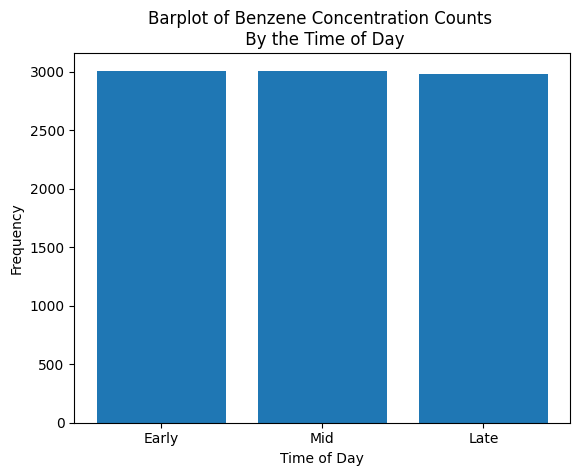

In [102]:
benzene_by_time_of_day=aq_cleaned_relevant_data['Time_of_Day'].value_counts()
plt.bar(x=aq_cleaned_relevant_data.Time_of_Day.cat.categories,height=benzene_by_time_of_day)
plt.xlabel("Time of Day")
plt.ylabel("Frequency")
plt.title("Barplot of Benzene Concentration Counts \n By the Time of Day")

And just for fun, here's some summary statistics of the benzene concentration done by month.

In [103]:
aq_cleaned_relevant_data.groupby("Month_TS")['C6H6(GT)'].agg(['mean','median','min','max','std','count'])

,mean,median,min,max,std,count
Month_TS,,,,,,
2004-03,9.932745,8.65,0.6,39.2,7.060527,510
2004-04,10.389177,8.50,0.5,40.3,7.531952,693
2004-05,10.219041,9.10,0.5,40.2,6.731684,730
2004-06,10.595748,9.50,0.5,36.9,6.579876,682
2004-07,10.599462,9.90,1.3,37.3,6.231206,743
2004-08,6.993669,6.30,1.0,30.7,3.864837,695
2004-09,11.554558,9.70,0.9,41.2,8.008161,702
2004-10,13.525303,11.10,0.5,52.1,9.117799,743
2004-11,12.511806,10.10,0.2,63.7,9.838577,720


## **Possible Relationships Between True Benzene Concentration and Other Explanatory Variables**

Now comes the fun part! It's also a bit more challenging interpreting the data with at least one more variable in the mix.

 We'll start off with a correlation matrix to see if any variables not related to the true benzene concentration have any linear relationships, which could indicate issues for multicollinearity. In other words, we'll see if any two explanatory variables appear to have a linear relationship.

In [104]:
aq_cleaned_relevant_data.iloc[:,0:9].corr()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.883795,0.892964,-0.771938,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.883795,1.000000,0.981950,-0.735744,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.892964,0.981950,1.000000,-0.796703,0.777254,0.880578,0.241373,-0.090380,0.186933
PT08.S3(NOx),-0.771938,-0.735744,-0.796703,1.000000,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
PT08.S4(NO2),0.682881,0.765731,0.777254,-0.538468,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.899324,0.865689,0.880578,-0.796569,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.048627,0.198956,0.241373,-0.145112,0.561270,-0.027172,1.000000,-0.578621,0.656397
RH,0.114606,-0.061681,-0.090380,-0.056740,-0.032188,0.124956,-0.578621,1.000000,0.167971
AH,0.135324,0.167972,0.186933,-0.232017,0.629641,0.070751,0.656397,0.167971,1.000000


Although it'll be difficult to see, we could also do some scatterplot matrices that visualize these relationships. We could also get a clearer picture on if one explanatory variable has a relationship with another, linear or otherwise.

First, we'll look at the scatterplot matrix involving the benzene concentration and the sensor variables. We can easily see that both linear and non-linear relationships exist within the sensor variables.

array([[<Axes: xlabel='PT08.S1(CO)', ylabel='PT08.S1(CO)'>,
        <Axes: xlabel='C6H6(GT)', ylabel='PT08.S1(CO)'>,
        <Axes: xlabel='PT08.S2(NMHC)', ylabel='PT08.S1(CO)'>,
        <Axes: xlabel='PT08.S3(NOx)', ylabel='PT08.S1(CO)'>,
        <Axes: xlabel='PT08.S4(NO2)', ylabel='PT08.S1(CO)'>,
        <Axes: xlabel='PT08.S5(O3)', ylabel='PT08.S1(CO)'>],
       [<Axes: xlabel='PT08.S1(CO)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='C6H6(GT)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='PT08.S2(NMHC)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='PT08.S3(NOx)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='PT08.S4(NO2)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='PT08.S5(O3)', ylabel='C6H6(GT)'>],
       [<Axes: xlabel='PT08.S1(CO)', ylabel='PT08.S2(NMHC)'>,
        <Axes: xlabel='C6H6(GT)', ylabel='PT08.S2(NMHC)'>,
        <Axes: xlabel='PT08.S2(NMHC)', ylabel='PT08.S2(NMHC)'>,
        <Axes: xlabel='PT08.S3(NOx)', ylabel='PT08.S2(NMHC)'>,
        <Axes: xlabel='PT08.S4(NO2)', ylabel='

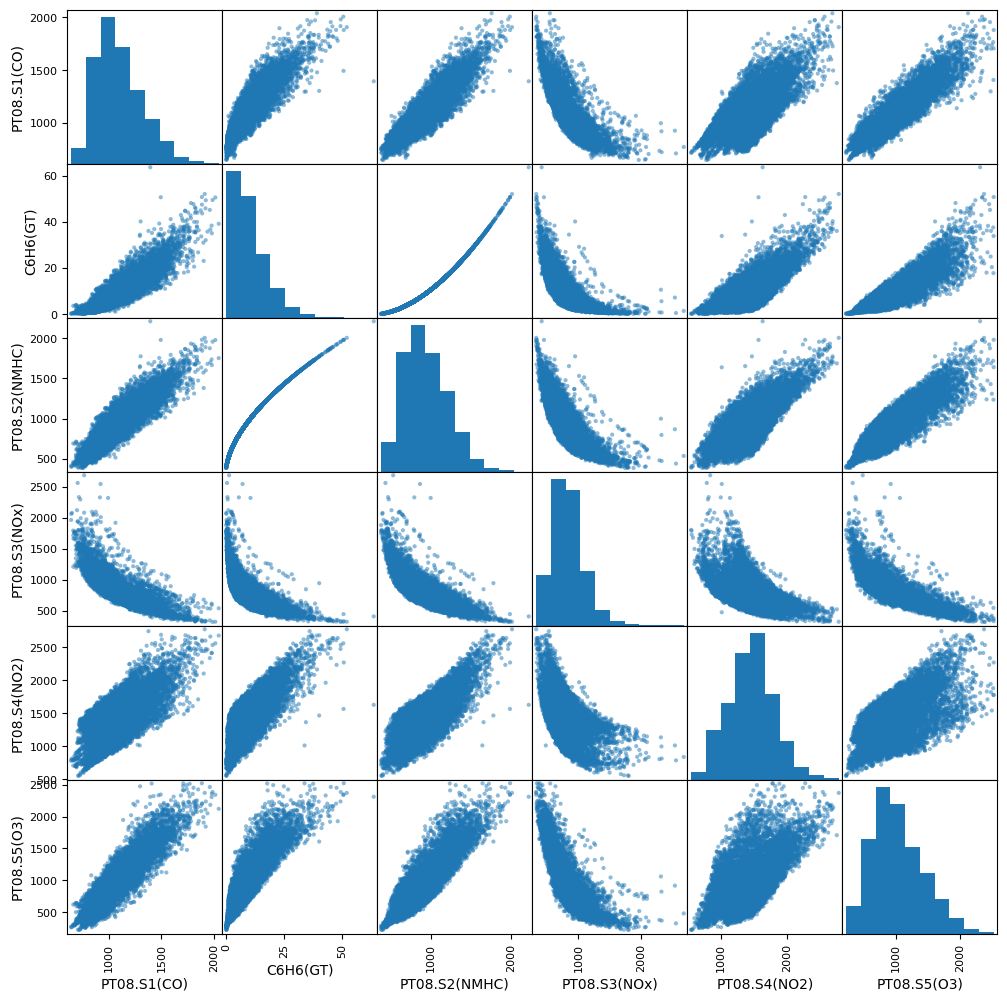

In [131]:
pd.plotting.scatter_matrix(aq_cleaned_relevant_data.iloc[:,0:6],figsize=(12,12))

Separately, we can look at the scatterplot matrix for the benzene concentration and the weather variables. We can see that temperature has an effect on both relative and absolute humidity.

array([[<Axes: xlabel='C6H6(GT)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='T', ylabel='C6H6(GT)'>,
        <Axes: xlabel='RH', ylabel='C6H6(GT)'>,
        <Axes: xlabel='AH', ylabel='C6H6(GT)'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='T'>,
        <Axes: xlabel='T', ylabel='T'>, <Axes: xlabel='RH', ylabel='T'>,
        <Axes: xlabel='AH', ylabel='T'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='RH'>,
        <Axes: xlabel='T', ylabel='RH'>,
        <Axes: xlabel='RH', ylabel='RH'>,
        <Axes: xlabel='AH', ylabel='RH'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='AH'>,
        <Axes: xlabel='T', ylabel='AH'>,
        <Axes: xlabel='RH', ylabel='AH'>,
        <Axes: xlabel='AH', ylabel='AH'>]], dtype=object)

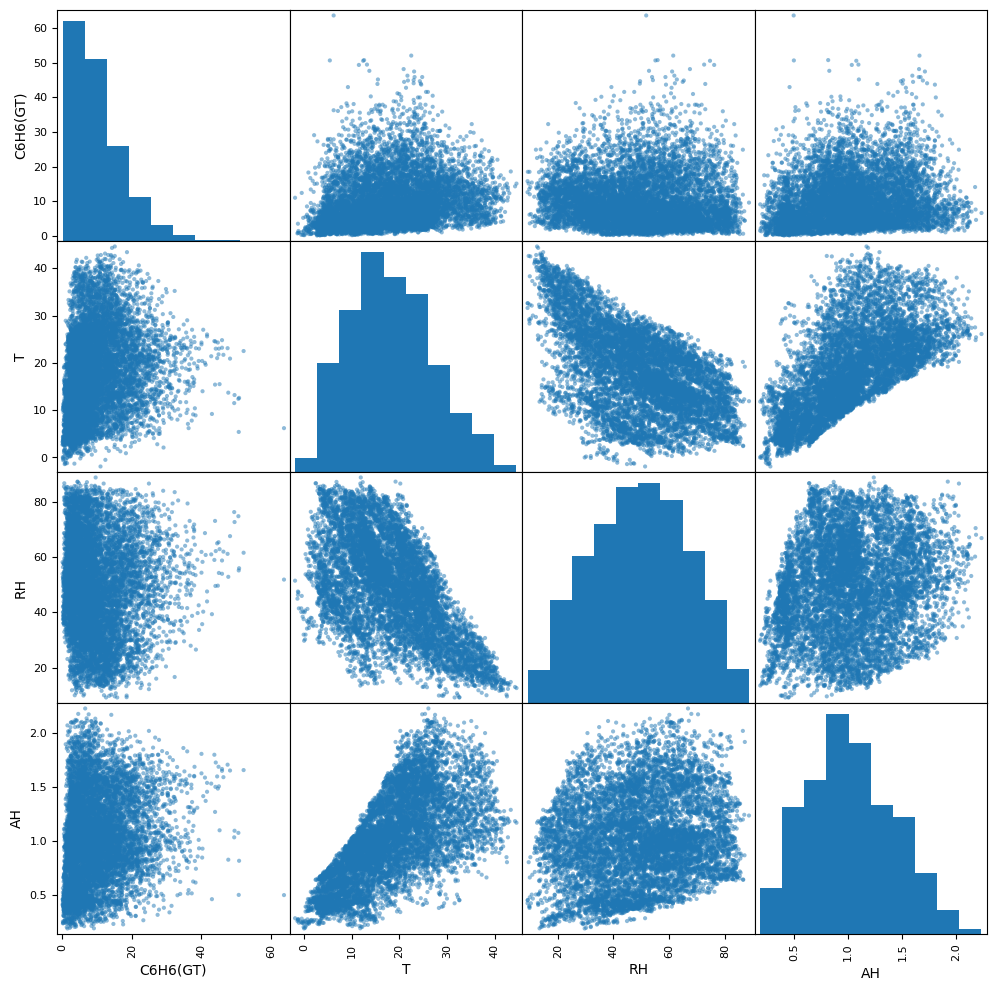

In [132]:
pd.plotting.scatter_matrix(aq_cleaned_relevant_data.iloc[:,[1,6,7,8]],figsize=(12,12))

From the scatterplot of the benzene concentration and temperature, it's very hard to tell if a relationship exists between the two. If so, we don't know what *type* of relationship it could have. Given a correlation coefficient of slightly less than 0.2, we might consider a transformation of at least one of these variables or doing a different type of model altogether.

Text(0.5, 1.0, 'Scatterplot of Benzene Concentration vs. Temperature')

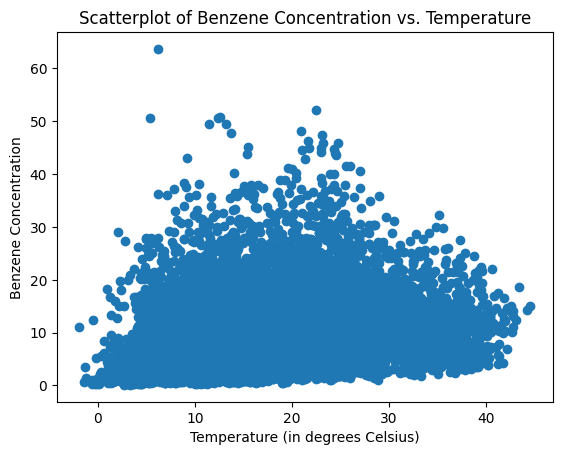

In [133]:
plt.scatter(x="T",y="C6H6(GT)",data=aq_cleaned_relevant_data)
plt.xlabel("Temperature (in degrees Celsius)")
plt.ylabel("Benzene Concentration")
plt.title("Scatterplot of Benzene Concentration vs. Temperature")

Scatterplot of Linear Relationship Between Benzene Concentration and Relative Humidity

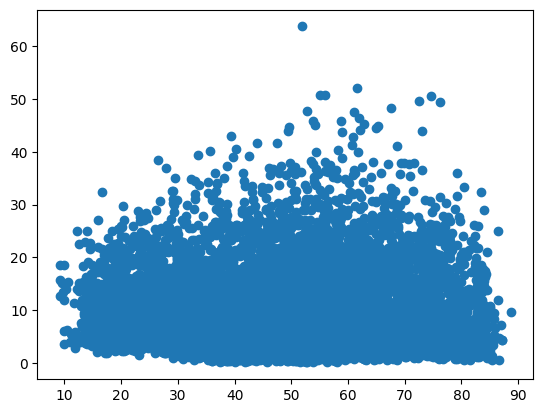

In [108]:
plt.scatter(x="RH",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Absolute Humidity

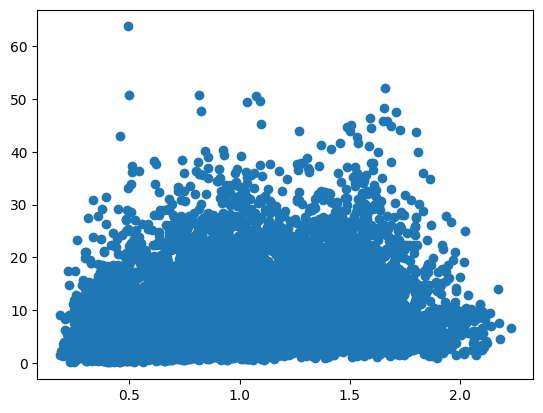

In [109]:
plt.scatter(x="AH",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Carbon Monoxide

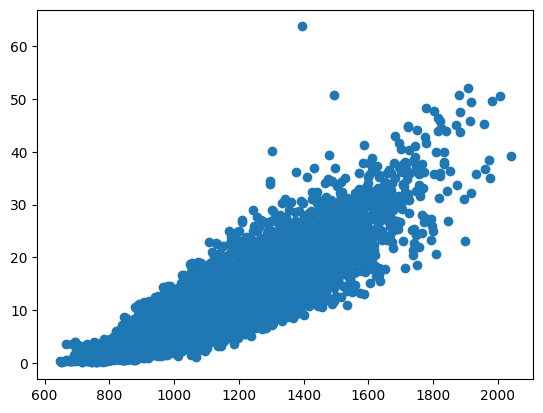

In [110]:
plt.scatter(x="PT08.S1(CO)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Non-Metanic Hydrocarbons

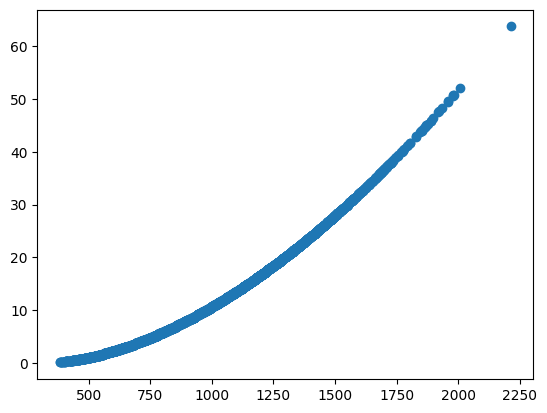

In [111]:
plt.scatter(x="PT08.S2(NMHC)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Both Nitrogen Oxides

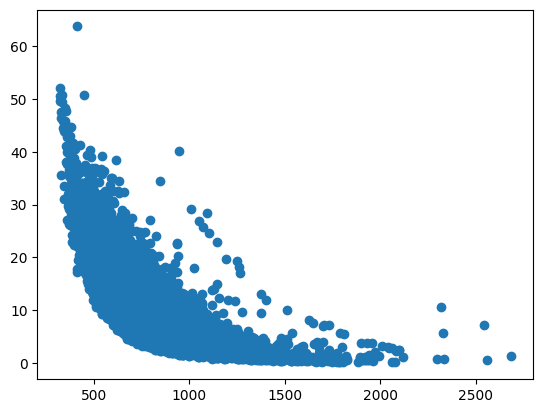

In [112]:
plt.scatter(x="PT08.S3(NOx)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Nitrogen Dioxide

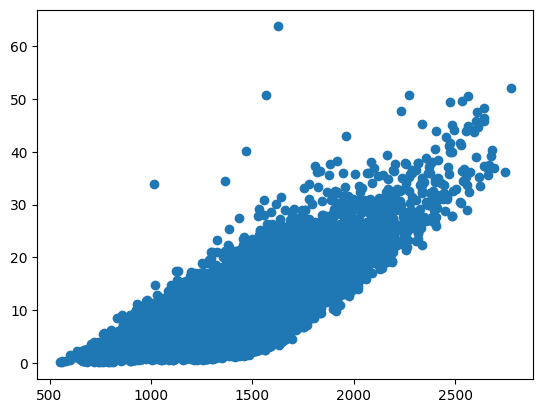

In [113]:
plt.scatter(x="PT08.S4(NO2)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Ozone

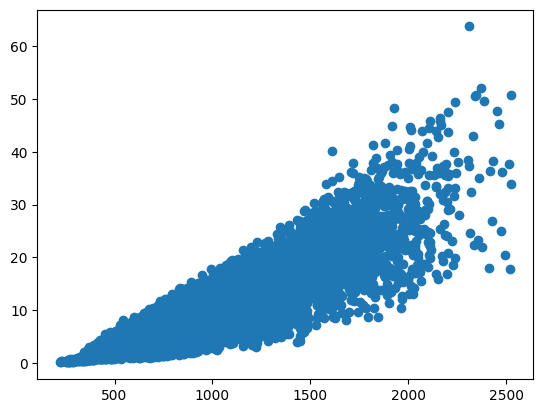

In [114]:
plt.scatter(x="PT08.S5(O3)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

## **Distributions and Relationships with Respect to Units of Time**

Here's what would happen if we were to take the average benzene concentration and partition it by date.

In [115]:
average_benzene_concentration_per_day=aq_cleaned_relevant_data.groupby('Date_TS')['C6H6(GT)'].mean()
average_benzene_concentration_per_day

,C6H6(GT)
Date_TS,
2004-03-10,8.450000
2004-03-11,7.979167
2004-03-12,12.129167
2004-03-13,10.916667
2004-03-14,9.637500
...,...
2005-03-31,5.220833
2005-04-01,3.412500
2005-04-02,2.529167


Below is a time plot that tracks the average benzene concentration per day.

Text(0.5, 1.0, 'Daily Average Benzene Concentration \n (in micrograms per cubic meter)')

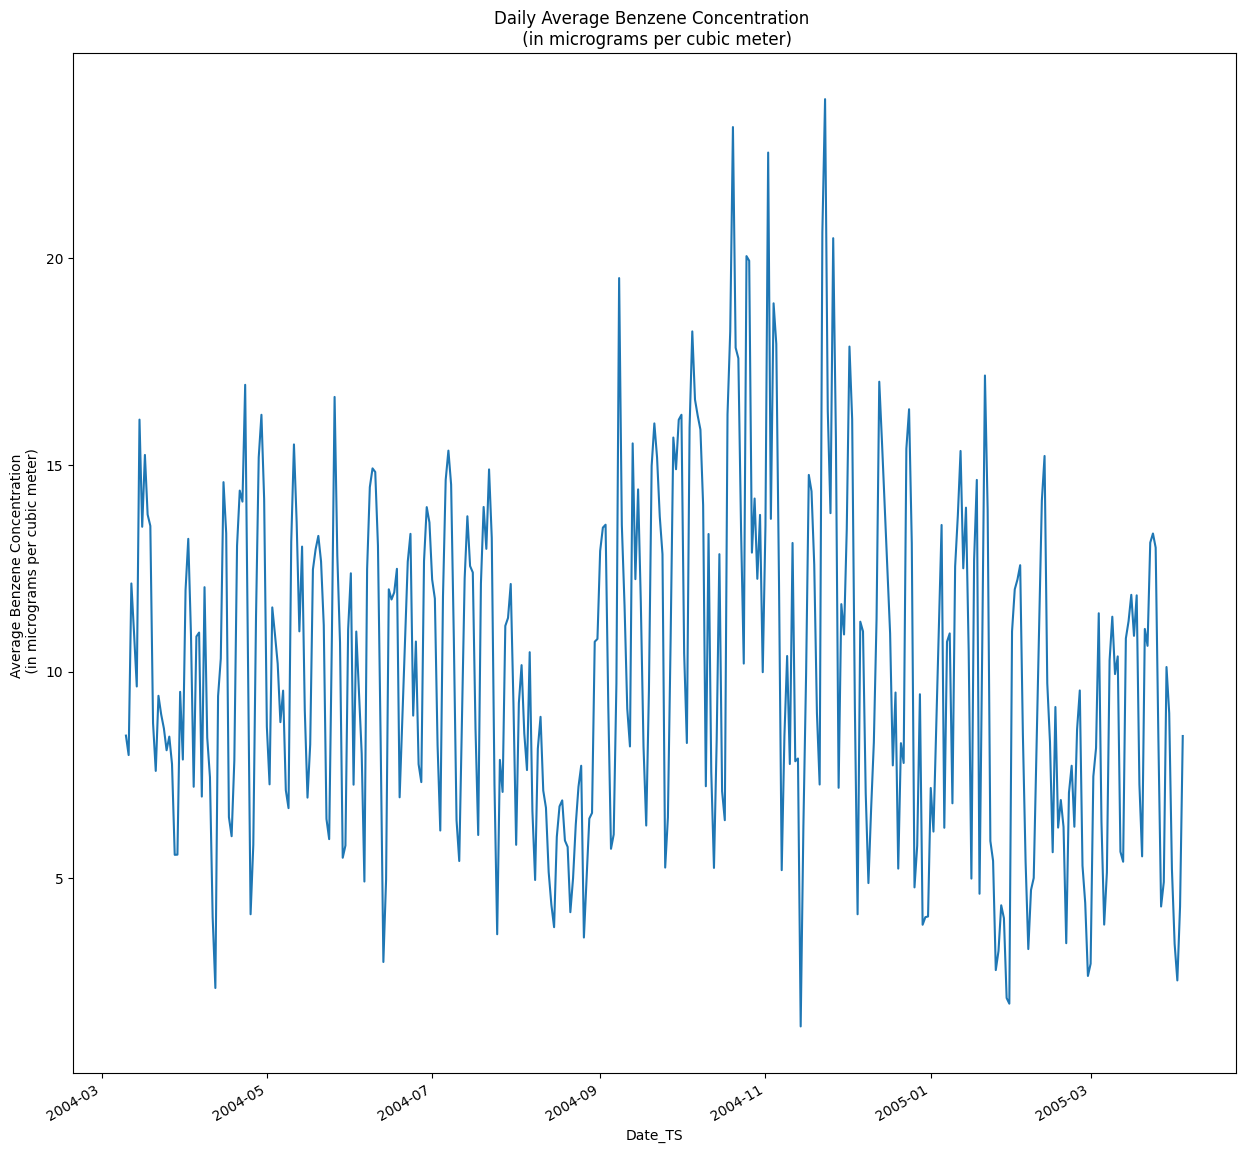

In [136]:
average_benzene_concentration_per_day.plot(figsize=(15,15))
plt.ylabel("Average Benzene Concentration \n (in micrograms per cubic meter)")
plt.title("Daily Average Benzene Concentration \n (in micrograms per cubic meter)")

<Axes: xlabel='T', ylabel='C6H6(GT)'>

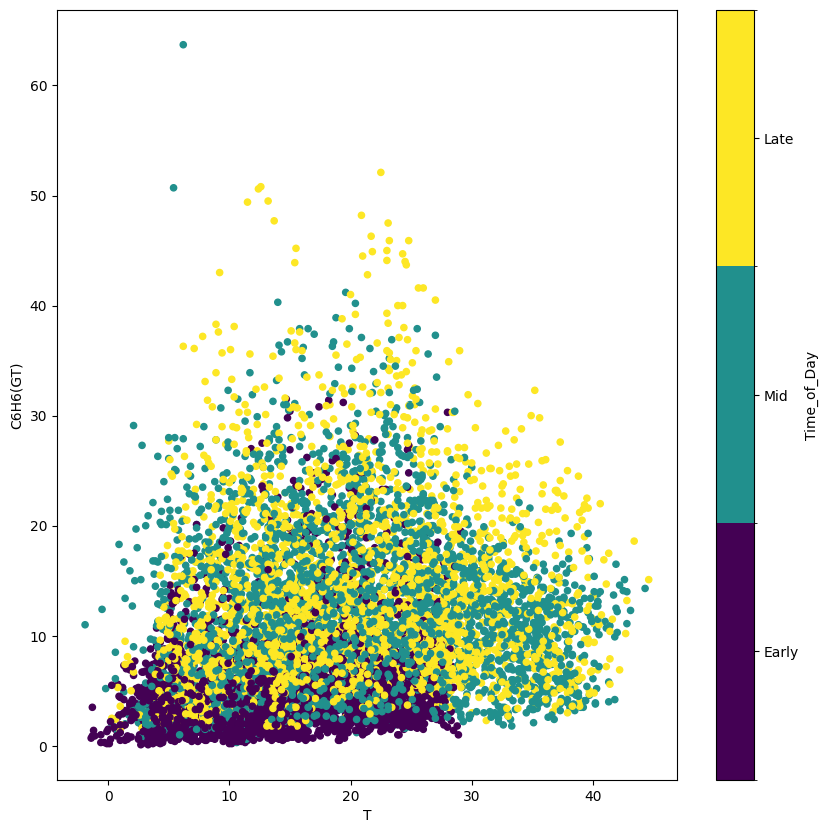

In [135]:
aq_cleaned_relevant_data.plot.scatter(x="T",y="C6H6(GT)",c="Time_of_Day",cmap="viridis",figsize=(10,10))

<Axes: xlabel='RH', ylabel='C6H6(GT)'>

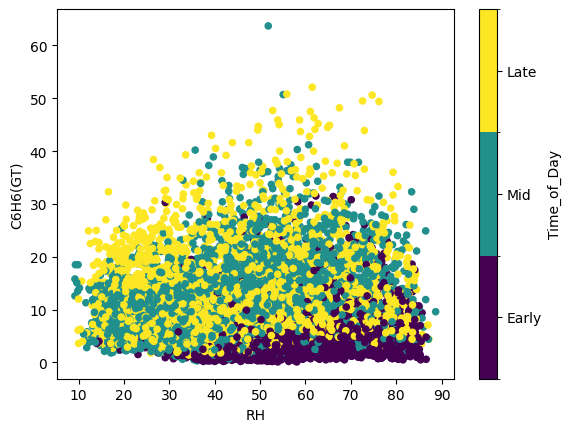

In [118]:
aq_cleaned_relevant_data.plot.scatter(x="RH",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

<Axes: xlabel='AH', ylabel='C6H6(GT)'>

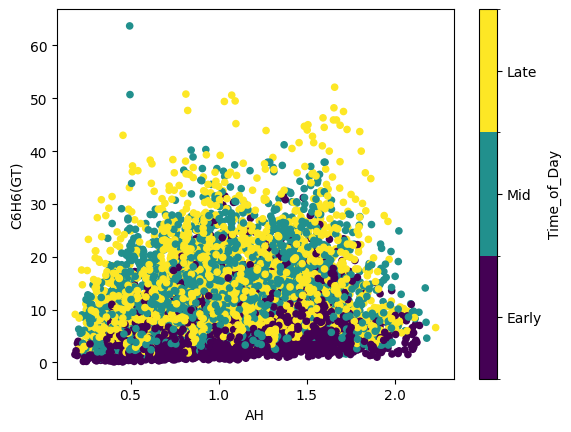

In [119]:
aq_cleaned_relevant_data.plot.scatter(x="AH",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

<Axes: xlabel='PT08.S1(CO)', ylabel='C6H6(GT)'>

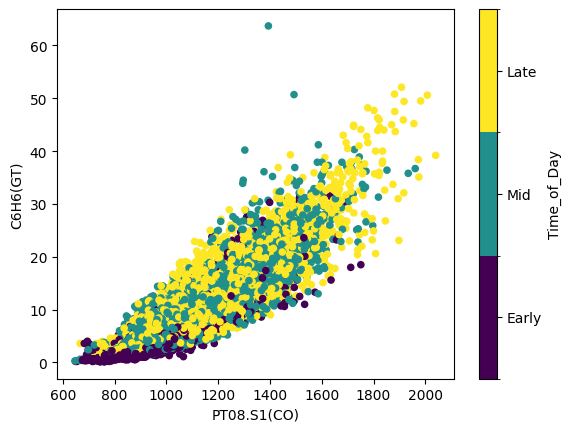

In [120]:
aq_cleaned_relevant_data.plot.scatter(x="PT08.S1(CO)",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

<Axes: xlabel='PT08.S2(NMHC)', ylabel='C6H6(GT)'>

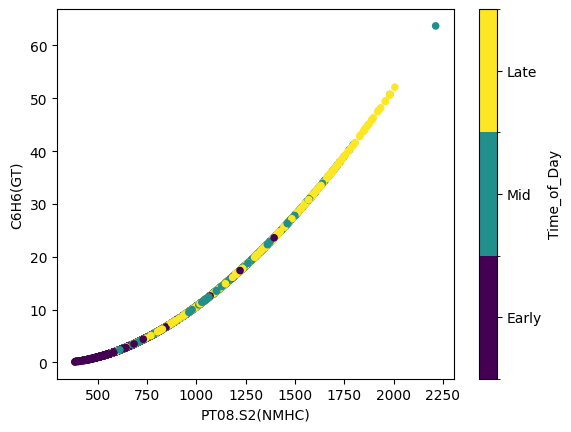

In [121]:
aq_cleaned_relevant_data.plot.scatter(x="PT08.S2(NMHC)",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

<Axes: xlabel='PT08.S3(NOx)', ylabel='C6H6(GT)'>

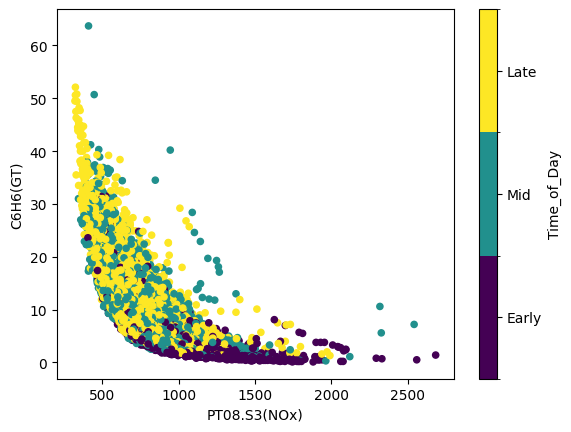

In [122]:
aq_cleaned_relevant_data.plot.scatter(x="PT08.S3(NOx)",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

<Axes: xlabel='PT08.S4(NO2)', ylabel='C6H6(GT)'>

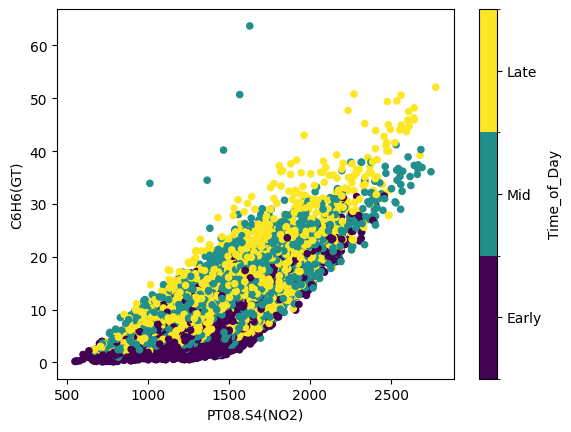

In [123]:
aq_cleaned_relevant_data.plot.scatter(x="PT08.S4(NO2)",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

<Axes: xlabel='PT08.S5(O3)', ylabel='C6H6(GT)'>

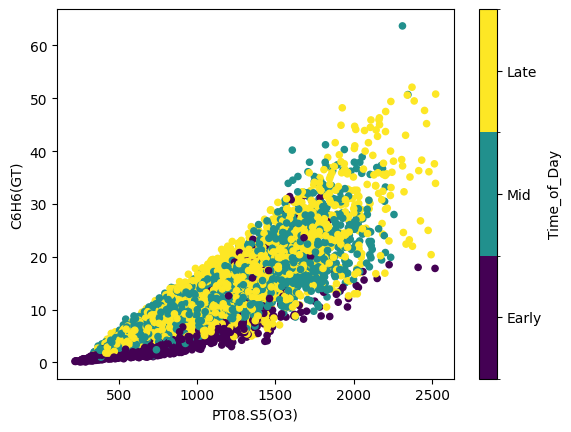

In [124]:
aq_cleaned_relevant_data.plot.scatter(x="PT08.S5(O3)",y="C6H6(GT)",c="Time_of_Day",cmap="viridis")

For something slightly better, we'll take the hour of day into account.

In [125]:
average_benzene_concentration_per_hour=aq_cleaned_relevant_TS_data.groupby('Time_TS')['C6H6(GT)'].mean()
average_benzene_concentration_per_hour

,C6H6(GT)
Time_TS,
0 days 00:00:00,7.684140
0 days 01:00:00,5.991711
0 days 02:00:00,4.379467
0 days 03:00:00,3.379255
0 days 04:00:00,2.916711
0 days 05:00:00,3.068435
0 days 06:00:00,4.756117
0 days 07:00:00,10.398936
0 days 08:00:00,15.894149


(0.0, 18.476522946799456)

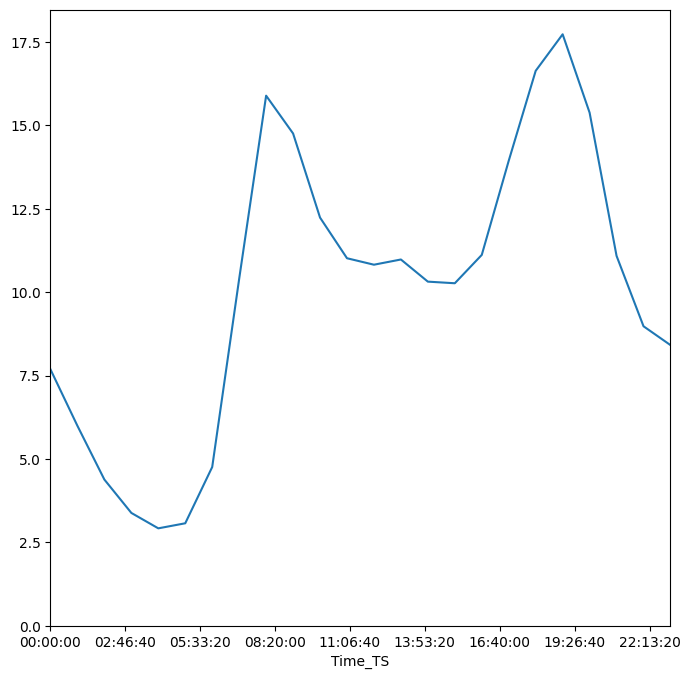

In [126]:
average_benzene_concentration_per_hour.plot(figsize=(8,8))
plt.ylim(0)

In [127]:
average_benzene_concentration_per_month=aq_cleaned_relevant_data.groupby('Month_TS')['C6H6(GT)'].mean()
average_benzene_concentration_per_month

,C6H6(GT)
Month_TS,
2004-03,9.932745
2004-04,10.389177
2004-05,10.219041
2004-06,10.595748
2004-07,10.599462
2004-08,6.993669
2004-09,11.554558
2004-10,13.525303
2004-11,12.511806


(0.0, 13.9873150941353)

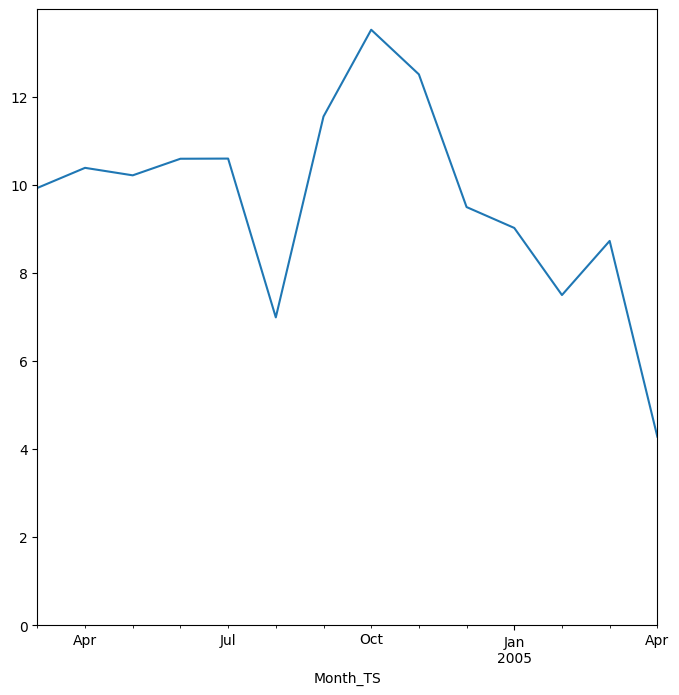

In [128]:
average_benzene_concentration_per_month.plot(figsize=(8,8))
plt.ylim(0)

Here's the average benzene concentration done by the time of day and month.

In [129]:
aq_cleaned_relevant_data.groupby(['Month_TS','Time_of_Day'])['C6H6(GT)'].mean()

/tmp/ipython-input-1133419218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aq_cleaned_relevant_data.groupby(['Month_TS','Time_of_Day'])['C6H6(GT)'].mean()


Month_TS  Time_of_Day
2004-03   Early           4.130952
          Mid            12.741667
          Late           12.822414
2004-04   Early           5.429741
          Mid            12.485217
          Late           13.283117
2004-05   Early           5.992917
          Mid            12.226316
          Late           12.352675
2004-06   Early           6.124123
          Mid            12.269565
          Late           13.428571
2004-07   Early           6.939271
          Mid            12.043548
          Late           12.800806
2004-08   Early           4.972340
          Mid             8.190948
          Late            7.858772
2004-09   Early           6.292241
          Mid            13.948927
          Late           14.351899
2004-10   Early           6.968548
          Mid            16.171660
          Late           17.446371
2004-11   Early           5.329167
          Mid            15.233333
          Late           16.972917
2004-12   Early           4.609821
          Mid            11.373661
          Late           12.624537
2005-01   Early           4.227074
          Mid            10.840086
          Late           12.076126
2005-02   Early           4.209000
          Mid             8.797500
          Late            9.536735
2005-03   Early           3.647984
          Mid            10.466397
          Late           12.081855
2005-04   Early           2.565625
          Mid             5.867742
          Late            4.533333
Name: C6H6(GT), dtype: float64

And just for fun, here's the average benzene concentrations done by year, even though portions of both years were used.

In [130]:
aq_cleaned_relevant_data.groupby('Year_TS')['C6H6(GT)'].mean()

,C6H6(GT)
Year_TS,
2004,10.631197
2005,8.294595
